#### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading data

In [86]:
df = pd.read_csv('house_price.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


#### Remove missing data

In [87]:
df.dropna(axis=0, inplace=True)

In [88]:
area_column = df['Area']
new_area_column = area_column.apply(lambda x: int(x.replace(',', '')))
df['Area'] = new_area_column

In [89]:
df.index = range(len(df))

#### Data visualization

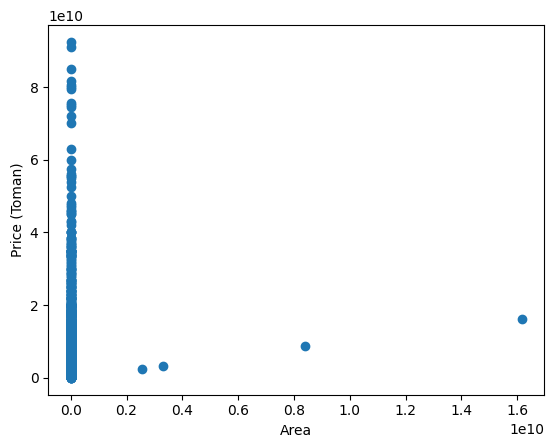

In [74]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

#### Removing incorrect/outlier data (Decided by the scatters above)

In [90]:
for i in df.index:
    if df.loc[i, 'Area'] > 1500:
        df.drop(index=i, inplace=True)

##### Let's take another look at the scatter above

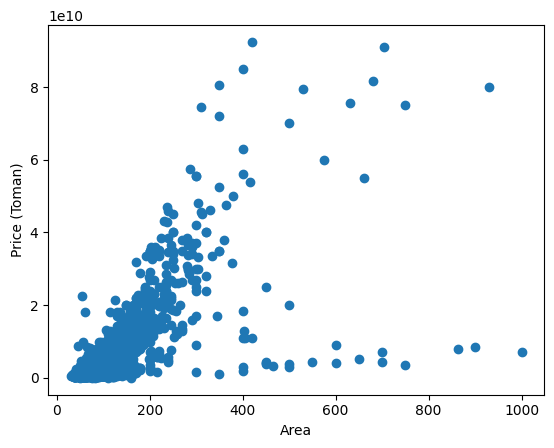

In [91]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

#### Training our model

##### I choose area, room and address features for prediction. The reason is domain knowlage of real estate that almost everybody has.

In [80]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import json

##### If you make no changes in dataset there is no need to run the cell below

In [81]:
df_addresses_unique = df[['Address']].drop_duplicates()
df_addresses_unique.index = range(len(df_addresses_unique))
addresses_hard_data = {}
for index, row in df_addresses_unique.iterrows():
    addresses_hard_data[row['Address']] = index
    
with open('addresses_hard_data.json', 'w+') as f:
    json.dump(addresses_hard_data, f)

In [82]:
with open('addresses_hard_data.json') as f:
    data = json.load(f)
df['Address'] = df['Address'].apply(lambda a: data[a])

In [83]:
x = df[['Area', 'Address', 'Room']]
y = df[['Price']]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)